In [ ]:
import json
from core.analysis import *

In [ ]:
db = access_db()

In [ ]:
trials = get_trial_data(db)

In [ ]:
participants = get_participant_data(db)

In [ ]:
wids = [27046826551,
67313721753,
14715705020,
65643517184,
86979612220,
26312944991]
#Worker IDs of subjects who completed expt
wids = [str(i) for i in wids]

Getting data for users who completed the experiment

In [ ]:
users = participants[participants['workerID'].isin(wids) & participants['completedTask'] == 1]['userID']
results = trials[trials['userID'].isin(users)]
results

In [ ]:
fig = plt.figure()
ax = plt.subplot(1, 2, 1)
ax.plot(range(12), range(12))
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(range(12), range(12))
fig.suptitle("yeet")

In [40]:
def plot_repeat_trials(results, userID):
    user_trials = results[results['userID'] == userID]
    repeat_types = user_trials[user_trials['trialType'] == 'repeat']['lemma'].unique()
    for l in repeat_types:
        original_result, senses = get_subject_mtx(results, userID, l, 'test')
        repeat_result, _ = get_subject_mtx(results, userID, l, 'repeat')
        my_eyes = plt.figure()
        ax1 = plt.subplot(1, 2, 1)
        orig_img = ax1.imshow(original_result)
        annotate_mtx(original_result, orig_img, ax1, senses)
        ax2 = plt.subplot(1, 2, 2)
        rep_img = ax2.imshow(repeat_result)
        annotate_mtx(repeat_result, rep_img, ax2, senses)
        pos = 2
        my_eyes.subplots_adjust(right = pos)
        my_eyes.suptitle("Annotations for Repeated Type " + l, x = pos / 1.9)


def annotate_mtx(result_mtx, im, ax, senses):
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(senses)))
    ax.set_yticks(np.arange(len(senses)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(senses)
    ax.set_yticklabels(senses)
    
    threshold = im.norm(result_mtx.max())/2.
        

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    textcolors = ['black', 'white']
    # Loop over data dimensions and create text annotations.
    for i in range(len(senses)):
        for j in range(len(senses)):
            square_color = textcolors[int(im.norm(result_mtx[i][j]) > threshold)]
            text = ax.text(j, i, np.round(result_mtx[i][j], 3),
                           ha="center", va="center", color=square_color)

    #fig.tight_layout()
    #plt.show()


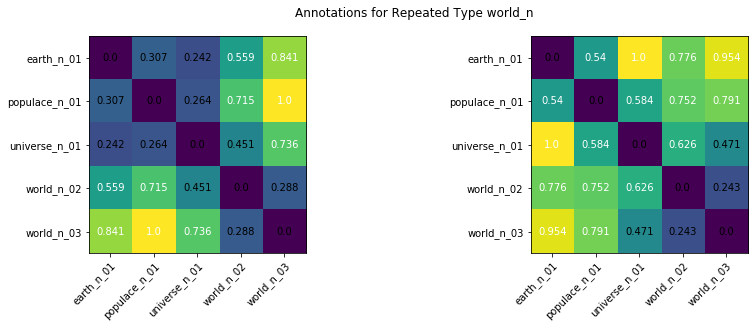

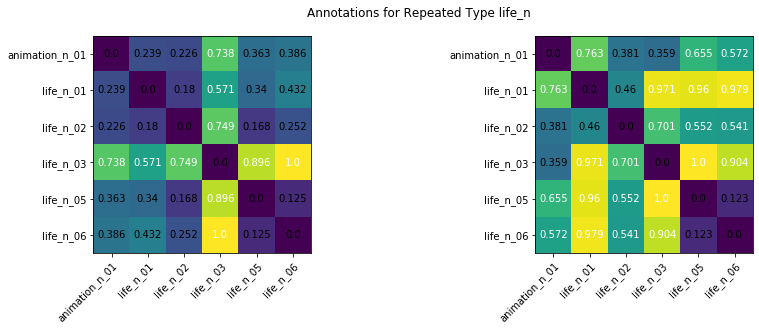

In [41]:
plot_repeat_trials(results, '-M3pVTw9ili6muvdZKg4')

Sanity check on definitions of bank

In [12]:
import matplotlib.pyplot as plt

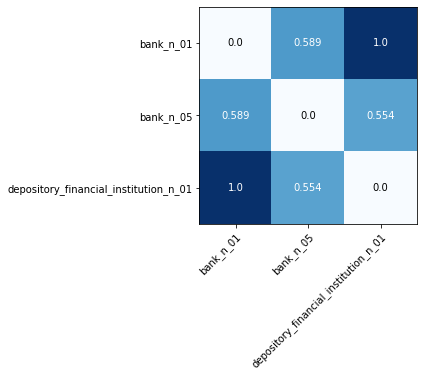

In [14]:
user_result, senses = get_subject_mtx(results, '-M3xbEdg3XIZca4MA7SZ', 'bank_n', 'training')
plot_mtx(user_result, senses)

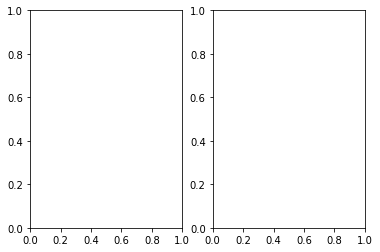

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)


Distance matrices for all the words shared between participants

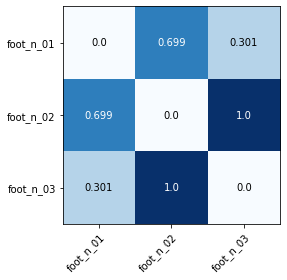

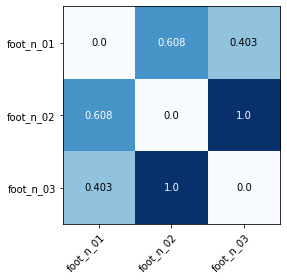

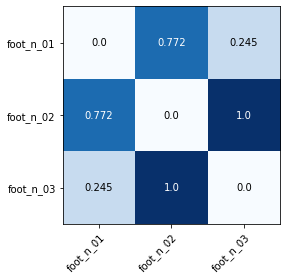

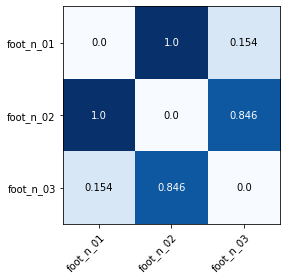

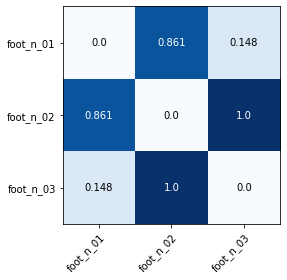

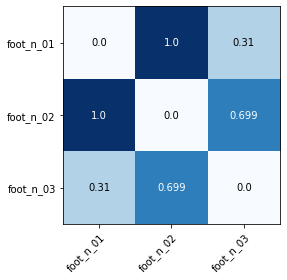

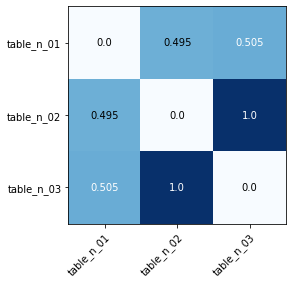

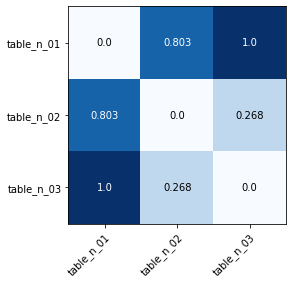

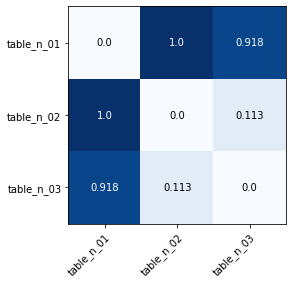

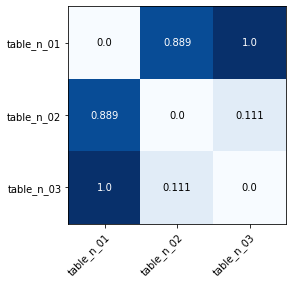

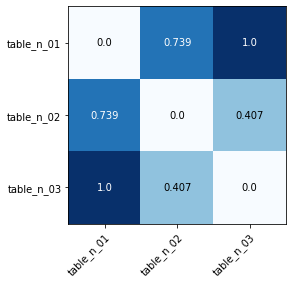

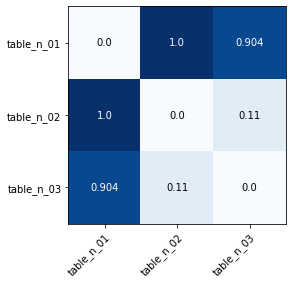

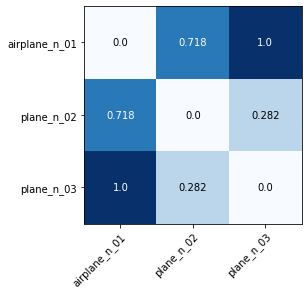

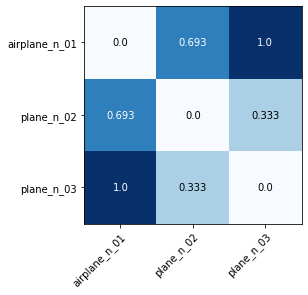

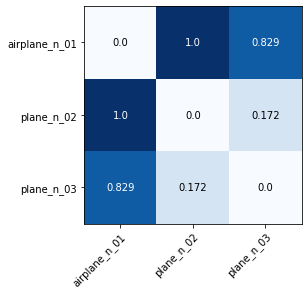

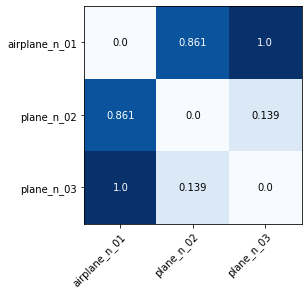

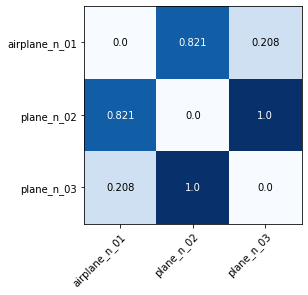

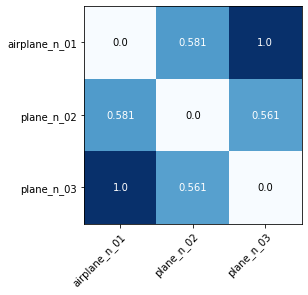

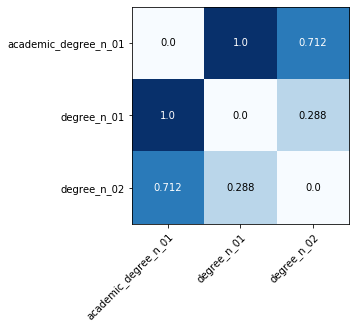

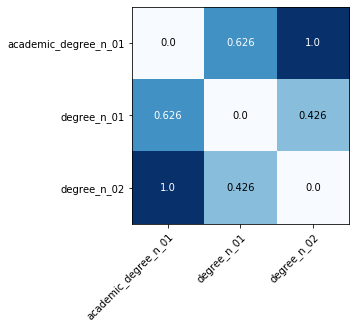

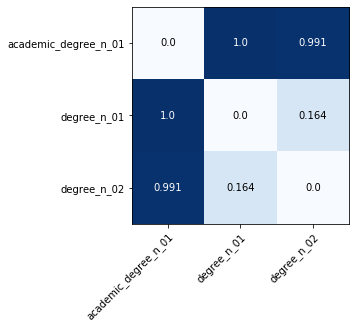

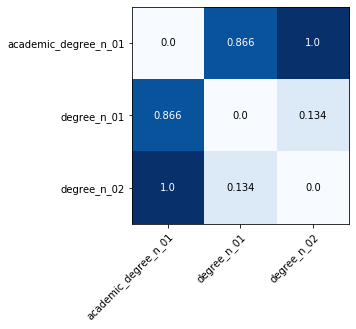

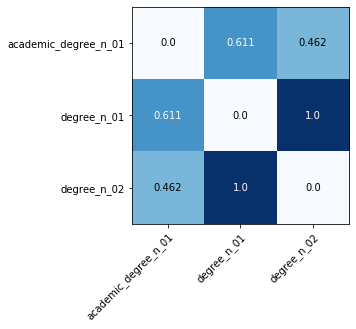

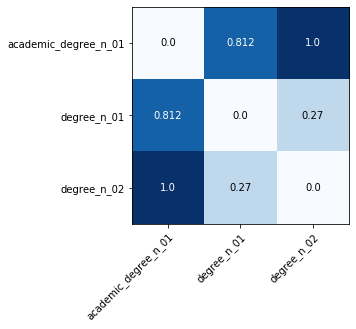

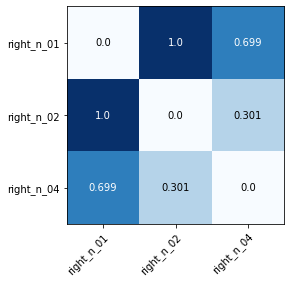

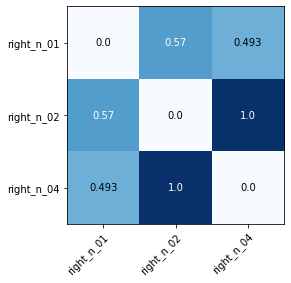

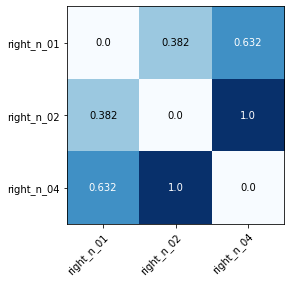

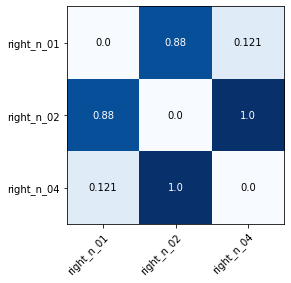

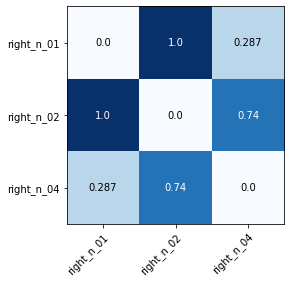

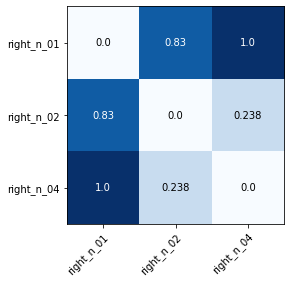

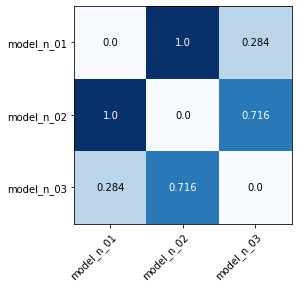

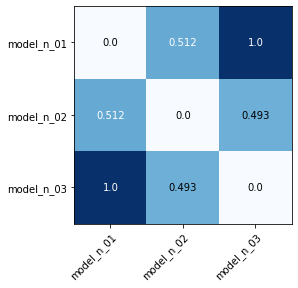

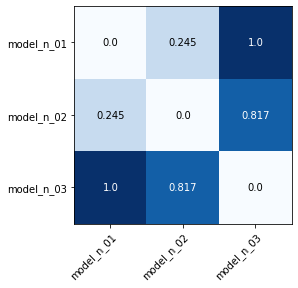

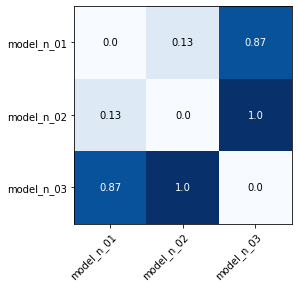

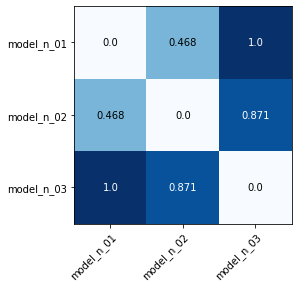

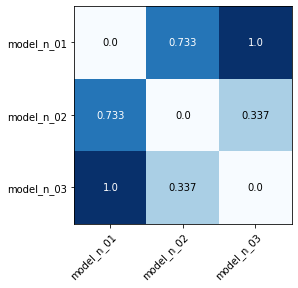

In [10]:
shared_words = results[results['trialType'] == 'shared']['lemma'].unique()
for w in shared_words:
    for u in users:
        user_result, senses = get_subject_mtx(results, u, w, 'shared')
        plot_mtx(user_result, senses)